# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [360]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(20)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [361]:
#A) seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [362]:
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float) 

In [363]:
df['Age'] = df['Age'].astype('Int64')

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    Int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 10.5+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

Como tem 20% de dados nulos em idade, vou fazer a troca pela mediana, que deu um numero inteiro.

In [365]:
#seu código aqui
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

In [366]:
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [367]:
df['Age'].mean()

37.50769230769231

In [368]:
df['Age'].median()

36.0

In [369]:
df_age_median = df['Age'].median()

df['Age'].fillna(df_age_median, inplace=True)
df['Age'] = df['Age'].astype('int64')

C:\Users\joaoz\AppData\Local\Temp\ipykernel_26976\2296266725.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [370]:
df['Age'].isnull().sum()

0

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [371]:
#seu código aqui
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [372]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [373]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [374]:
df['Home Ownership'].unique()

array(['Rented', 'Owned'], dtype=object)

In [375]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

Plote um boxplot da coluna Income pois percebi que o max esta quase o dobro da mendia e a mediana, e o desvio de padrão esta um pouco alto também, mas não apresentou outliers.
Em numero de filhos no boxplot apareceu um outliers, mas como é quantidade de filhos, algo comum ter 3 filhos acabei não consdirando com outliers.


In [376]:
#seu código aqui
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


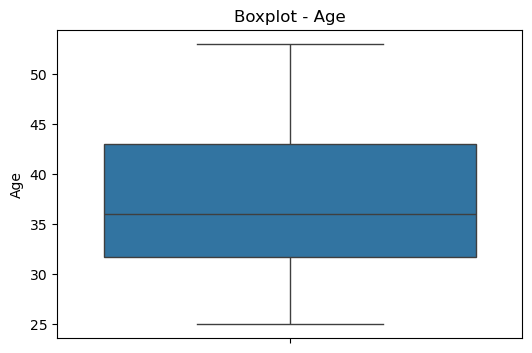

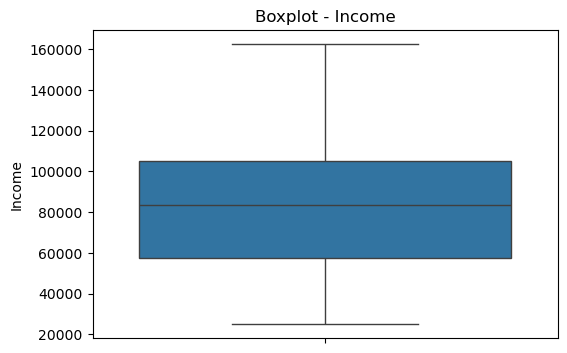

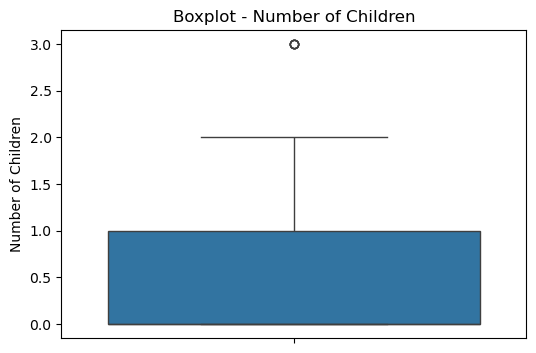

In [377]:
variaveis = ['Age', 'Income', 'Number of Children']

for col in variaveis:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

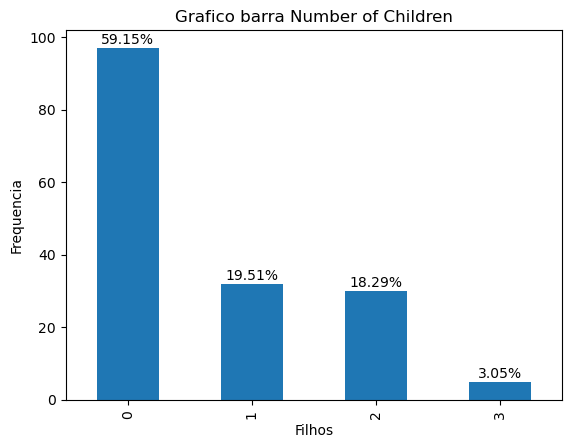

In [378]:
contagem = df['Number of Children'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v +1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Grafico barra Number of Children')
plt.xlabel('Filhos')
plt.ylabel('Frequencia')
plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

C:\Users\joaoz\AppData\Local\Temp\ipykernel_26976\740036663.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



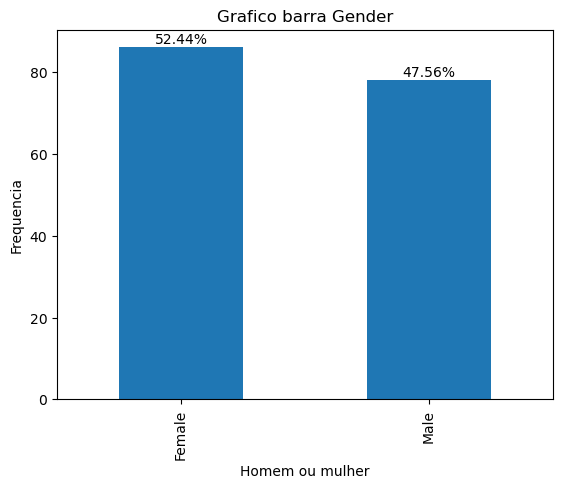

In [379]:
#seu código aqui
contagem = df['Gender'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v +1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Grafico barra Gender')
plt.xlabel('Homem ou mulher')
plt.ylabel('Frequencia')
plt.show()

C:\Users\joaoz\AppData\Local\Temp\ipykernel_26976\595952857.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



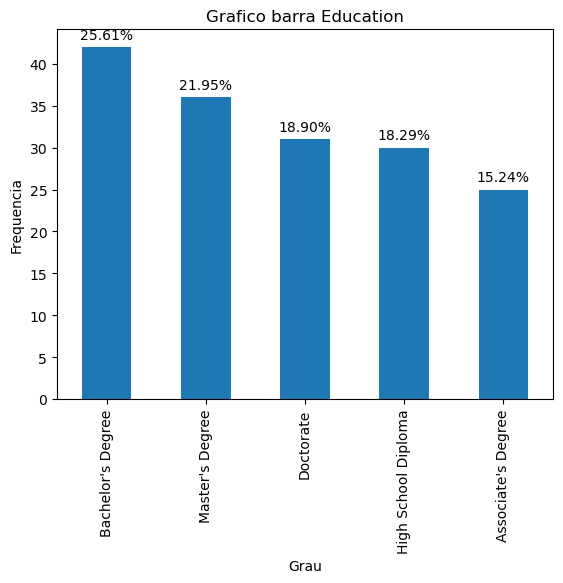

In [380]:
contagem = df['Education'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v +1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Grafico barra Education')
plt.xlabel('Grau')
plt.ylabel('Frequencia')
plt.show()

C:\Users\joaoz\AppData\Local\Temp\ipykernel_26976\2943338891.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



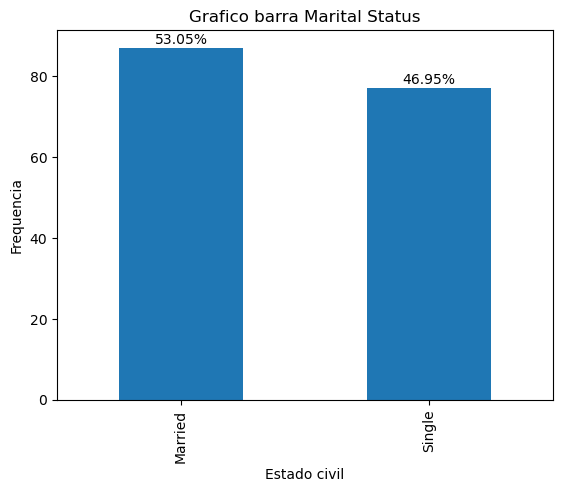

In [381]:
contagem = df['Marital Status'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v +1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Grafico barra Marital Status')
plt.xlabel('Estado civil')
plt.ylabel('Frequencia')
plt.show()

C:\Users\joaoz\AppData\Local\Temp\ipykernel_26976\1827943604.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



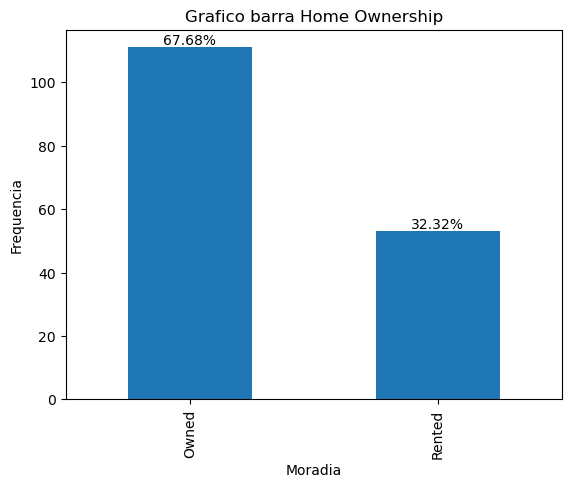

In [382]:
contagem = df['Home Ownership'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v +1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Grafico barra Home Ownership')
plt.xlabel('Moradia')
plt.ylabel('Frequencia')
plt.show()

C:\Users\joaoz\AppData\Local\Temp\ipykernel_26976\1646089561.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



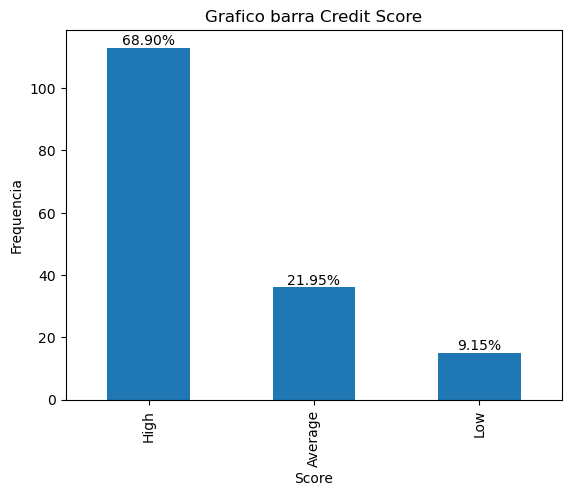

In [383]:
contagem = df['Credit Score'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v +1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Grafico barra Credit Score')
plt.xlabel('Score')
plt.ylabel('Frequencia')
plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

O conjunto de dados encontra-se estável e sem a presença de outliers. Assim, manter todos os dados será a melhor abordagem para o nosso projeto, garantindo maior completude para as análises.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [384]:
#seu código aqui
#Existe relação entre a idade e o status civil?
fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack')
fig.update_layout(title='Relação de Idade com Status Civil',
                  xaxis_title='Age',
                  yaxis_title='Frequencia',
                  legend_title='Status Civil')
fig.show()

Age	Gender	Income	Education	Marital Status	Number of Children	Home Ownership	Credit Score

In [385]:
#Qual a relação entre o score de crédito e o nível de escolaridade?
df_grouped = df.groupby(['Credit Score', 'Education']).size().reset_index(name='count')
total_Educ = df_grouped.groupby('Education')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_Educ) * 100

fig = px.bar(df_grouped, x='Education', y='percent', color='Credit Score', barmode='stack',
             labels={'Credit Score': 'Credit Score', 'percent': 'Porcentagem', 'Education': 'Education'})
fig.update_layout(title='Relação Score com Education',
                  yaxis_title='Porgentagem',
                  legend_title='Credit Score')
fig.show()

In [386]:
#O salário parece influenciar na idade?
df_grouped = df.groupby(['Age', 'Income']).size().reset_index(name='count')
total_income = df_grouped.groupby('Age')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_income) * 100

fig = px.bar(df_grouped, x='Age', y='percent', color='Income', barmode='stack',
             labels={'Age': 'Age', 'percent': 'Porcentagem', 'Income': 'Income'})
fig.update_layout(title='Relação Sálario para idade',
                  yaxis_title='Porcentagem',
                  legend_title='Age')
fig.show()

In [387]:
#O salário parece influenciar no Score de Crédito?
df_grouped = df.groupby(['Income', 'Credit Score']).size().reset_index(name='count')
total_score = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_score) * 100

fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Income', barmode='stack',
             labels={'Credit Score': 'Credit Score', 'percent': 'Porcentagem', 'Income': 'Income'})

fig.update_layout(title='Relação salaraio para Score',
                  yaxis_title='Porcentagem',
                  legend_title='Renda')
fig.show()

In [388]:
#Clientes com casa própria tendem a ter um score mais alto?
df_grouped = df.groupby(['Home Ownership', 'Credit Score']).size().reset_index(name='count')
total_score = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_score) * 100

fig = px.bar(df_grouped, x='Credit Score', y='percent', color='Home Ownership', barmode='stack',
             labels={'Credit Score': 'Score', 'percent': 'Porcentagem', 'Home Ownership': 'Casa'})
fig.update_layout(title='Relação Casa e Score',
                  yaxis_title='Porcentagem',
                  legend_title='Casa')
fig.show()

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [389]:
# seu código aqui
#Relação escolarida e genêno
df_grouped = df.groupby(['Education', 'Gender']).size().reset_index(name='count')
total_education = df_grouped.groupby('Gender')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_education) * 100

fig = px.bar(df_grouped, x='Education', y='percent', color='Gender', barmode='stack',
             labels={'Education': 'Education', 'percent': 'Porcentagem', 'Gender': 'Gender'})
fig.update_layout(title='Relação educação por genêro',
                  yaxis_title='Porcentagem',
                  legend_title='Gender')
fig.show()

In [390]:
#Genero e score
df_grouped = df.groupby(['Gender', 'Credit Score']).size().reset_index(name='count')
total_score = df_grouped.groupby('Credit Score')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_score) * 100

fig = px.bar(df_grouped, x='Gender', y='percent', color='Credit Score', barmode='stack',
            labels={'Gender': 'Gender', 'percent': 'Porcentagem', 'Credit Score': 'Credit Score'})
fig.update_layout(title='Relação Score por gênero',
                  yaxis_title='Porcentagem',
                  legend_title='Score')
fig.show()

In [391]:
#idade e escolaridade
df_grouped = df.groupby(['Age', 'Education']).size().reset_index(name='count')
total_education = df_grouped.groupby('Education')['count'].transform('sum') 
df_grouped['percent'] = (df_grouped['count'] / total_education) * 100
fig = px.bar(df_grouped, x='Education', y='percent', color='Age', barmode='stack',
             labels={'Education': 'Education', 'percent': 'Porcentagem', 'Age': 'Age'})
fig.update_layout(title='Relação idade por escolaridade',
                  yaxis_title='Porcentagem',
                  legend_title='Idade')
fig.show()

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [392]:
#seu código aqui
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children
Age,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
Number of Children,0.072432,0.084547,1.000000


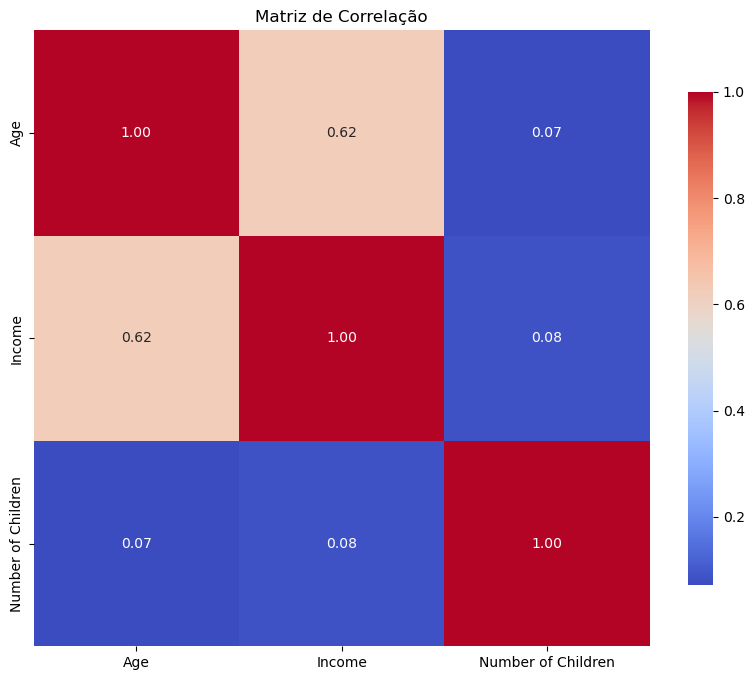

In [393]:
corelation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

# sua justificativa aqui
 Não tivemos uma grande base de correlações, pois temos poucas variáveis numéricas.
 A correlação mais alta foi entre 'Income' e 'Age', o que é esperado, pois pessoas mais velhas tendem a ter uma renda maior.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [394]:
#seu código aqui
# Apenas transformar em Label Enconder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Genero_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Home Ownership_encoded'] = label_encoder.fit_transform(df['Home Ownership'])
df['Marital Status_encoded'] = label_encoder.fit_transform(df['Marital Status'])

df = pd.get_dummies(df, columns=['Education'], prefix=['Education'], drop_first=True)
df['credit_score_labels'] = df['Credit Score'].map({'Low': 0, 'High': 1, 'Average': 2})

print(df.head())


   Age  Gender    Income Marital Status  Number of Children Home Ownership  \
0   25  Female   50000.0         Single                   0         Rented   
1   30    Male  100000.0        Married                   2          Owned   
2   35  Female   75000.0        Married                   1          Owned   
3   40    Male  125000.0         Single                   0          Owned   
4   45  Female  100000.0        Married                   3          Owned   

  Credit Score  Genero_encoded  Home Ownership_encoded  \
0         High               0                       1   
1         High               1                       0   
2         High               0                       0   
3         High               1                       0   
4         High               0                       0   

   Marital Status_encoded  Education_Bachelor's Degree  Education_Doctorate  \
0                       1                         True                False   
1                       

In [395]:
df.dtypes

Age                                int64
Gender                            object
Income                           float64
Marital Status                    object
Number of Children                 int64
Home Ownership                    object
Credit Score                      object
Genero_encoded                     int32
Home Ownership_encoded             int32
Marital Status_encoded             int32
Education_Bachelor's Degree         bool
Education_Doctorate                 bool
Education_High School Diploma       bool
Education_Master's Degree           bool
credit_score_labels                int64
dtype: object

In [396]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [397]:
df = df.drop(columns=['Gender', 'Home Ownership', 'Marital Status', 'Credit Score'], axis=1)
print(df.head())

   Age    Income  Number of Children  Genero_encoded  Home Ownership_encoded  \
0   25   50000.0                   0               0                       1   
1   30  100000.0                   2               1                       0   
2   35   75000.0                   1               0                       0   
3   40  125000.0                   0               1                       0   
4   45  100000.0                   3               0                       0   

   Marital Status_encoded  Education_Bachelor's Degree  Education_Doctorate  \
0                       1                            1                    0   
1                       0                            0                    0   
2                       0                            0                    1   
3                       1                            0                    0   
4                       0                            1                    0   

   Education_High School Diploma  Education_

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

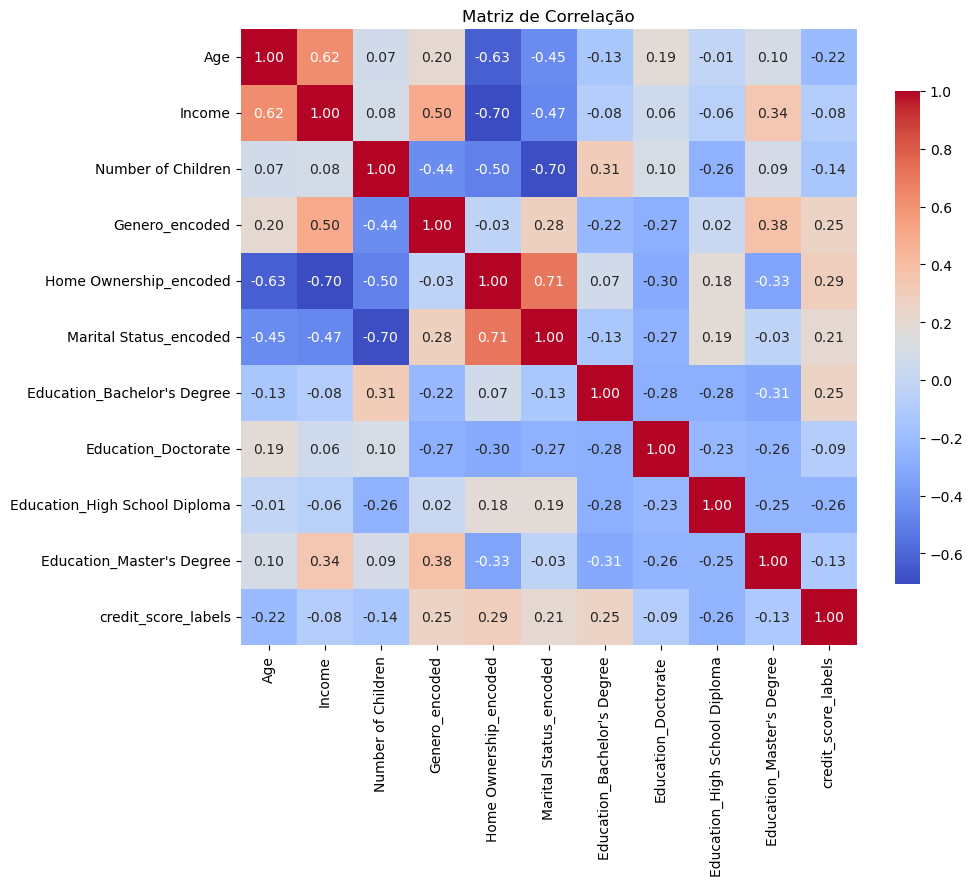

In [398]:
#seu código aqui
corelation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()

temos muitas correlações muito fortes, marital com home ownership e icome com home ornership

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [399]:
#fazer a separação da basa em treino e teste verifique utilizando shape
from sklearn.model_selection import train_test_split

In [400]:
# Definindo X e y
X = df.drop(columns=['credit_score_labels'])
y = df['credit_score_labels']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [401]:
x_train

,Age,Income,Number of Children,Genero_encoded,Home Ownership_encoded,Marital Status_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
84,36,125000.0,0,1,0,0,0,0,0,0
2,35,75000.0,1,0,0,0,0,1,0,0
94,30,117500.0,2,1,0,0,0,0,0,1
45,47,90000.0,1,0,0,0,0,1,0,0
42,32,57500.0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,46,97500.0,1,0,0,0,0,0,1,0
106,32,57500.0,0,1,1,1,0,0,0,0
14,36,70000.0,2,0,0,0,1,0,0,0
92,36,85000.0,1,0,0,0,0,1,0,0


In [402]:
x_test

,Age,Income,Number of Children,Genero_encoded,Home Ownership_encoded,Marital Status_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
135,25,55000.0,0,0,1,1,1,0,0,0
115,48,87500.0,1,0,0,0,0,1,0,0
131,26,55000.0,1,0,0,0,1,0,0,0
55,39,62500.0,2,0,0,0,1,0,0,0
95,35,90000.0,1,0,0,0,0,1,0,0
29,25,55000.0,0,0,1,1,1,0,0,0
157,48,82500.0,1,0,0,0,0,1,0,0
51,48,82500.0,1,0,0,0,0,1,0,0
101,36,95000.0,2,0,0,0,0,0,0,1
145,36,95000.0,1,0,0,0,0,0,1,0


In [403]:
y_train

84     1
2      1
94     1
45     1
42     2
      ..
71     1
106    2
14     1
92     1
102    1
Name: credit_score_labels, Length: 131, dtype: int64

In [404]:
y_test

135    2
115    1
131    2
55     1
95     1
29     2
157    1
51     1
101    1
145    1
19     2
85     0
15     1
66     1
24     0
30     1
132    1
105    0
152    1
16     1
75     1
18     0
12     0
9      1
31     1
155    1
98     1
56     1
134    1
160    2
139    1
78     1
60     1
Name: credit_score_labels, dtype: int64

**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

In [405]:
df.dtypes

Age                                int64
Income                           float64
Number of Children                 int64
Genero_encoded                     int32
Home Ownership_encoded             int32
Marital Status_encoded             int32
Education_Bachelor's Degree        int32
Education_Doctorate                int32
Education_High School Diploma      int32
Education_Master's Degree          int32
credit_score_labels                int64
dtype: object

C:\Users\joaoz\AppData\Local\Temp\ipykernel_26976\2676100456.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




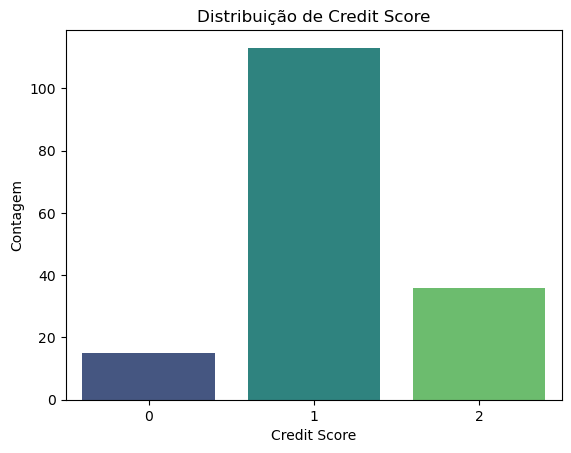

In [406]:
#É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento
sns.countplot(data=df, x='credit_score_labels', palette='viridis')
plt.title('Distribuição de Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Contagem')
plt.show()


In [407]:
## Calcular e imprimir as porcentagens dos valores na coluna
porcentagens = df['credit_score_labels'].value_counts(normalize=True) * 100
print("Porcentagens de Credit Score:")
print(porcentagens)

Porcentagens de Credit Score:
credit_score_labels
1    68.902439
2    21.951220
0     9.146341
Name: proportion, dtype: float64


**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [408]:
#seu código aqui
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Distribuição das classes após o SMOTE:")
print(y_train_resampled.value_counts())


Distribuição das classes após o SMOTE:
credit_score_labels
1    90
2    90
0    90
Name: count, dtype: int64


In [410]:
train_balance = y_train_resampled.value_counts()
print("Balanceamento em treino:")
print(train_balance)

Balanceamento em treino:
credit_score_labels
1    90
2    90
0    90
Name: count, dtype: int64


In [411]:
#salvar os testes e os treinos em cvs difetentes 
x_train_resampled.to_csv('x_train_resampled.csv', index=False)
y_train_resampled.to_csv('y_train_resampled.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [412]:
#subir o repositório no github
# Certifique-se de que o repositório está inicializado e configurado corretamente
!git add .
!git commit -m "Salvar resultados do modelo"
!git push origin main  
# esta tudo correto, o repositório foi atualizado com os resultados do modelo.

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
